>Jacob Lustig-Yaeger  

>January 11, 2016

# Saha-Boltzmann calibration of the Harvard sequence ("Cecilia Payne")

In [238]:
# Import some fundamental python packages
%matplotlib inline
import os
import numpy as np
import scipy as sp
import pdb
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=25, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 25.0

# 2.2 The Boltzmann and Saha laws
In thermodynamical equilibrium (TE) macroscopic equipartition laws hold with the gas temperature as
the major parameter. These are the Kirchhoff, Planck, Wien and Stefan-Boltzmann laws for radiation, and
the Maxwell, Saha and Boltzmann laws for matter. In this exercise we are concerned with the latter two.
They describe the division of the particles of a specific element over its different ionization stages and
over the discrete energy levels within each stage.

**Boltzmann law:** In TE the partitioning of a specific atom or ion stage over its discrete energy levels
("excitation equilibrium") is given by the Boltzmann distribution: $$ \frac{n_{r,s}}{N_r} = \frac{g_{r,s}}{U_r} e^{- \chi_{r,s} / kT}$$
with T the temperature, k the Boltzmann constant, $n_{r,s}$ the number of particles per cm$^3$ in level $s$ of
ionization stage $r$, $g_{r,s}$ the statistical weight of that level, and $\chi_{r,s}$ the excitation energy of that level measured from the ground state (r, 1), $N_r \equiv \Sigma n_{r,s}$ the total particle density in all levels of ionization stage $r$, and $U_r$ its partition function defined by $$ U_r \equiv g_{r,s} e^{-\chi_{r,s} / kT}$$  

**Inspect the hydrogen energy level diagram in Figure 7. Which transitions correspond to the hydrogen lines in Figure 5? Which transitions share lower levels and which share upper levels?**  

>Figure 5 shows H$\beta$, H$\gamma$, and H$\delta$ of the Balmer series which correspond to 4-2, 5-2, 6-2 transitions, respectively. They all share the lower levels, but vary in the upper levels. This is the Balmer series so all the transitions share n=2 as the lower level. 

**Payne's basic assumption was that the strength of the absorption lines observed in stellar spectra
scales with the population density of the lower level of the corresponding transition. Why would she
think so? It is not correct, but generally stellar absorption lines do get stronger at larger lower-level
population. In this exercise we follow her example and assume that the scaling is linear.**

>Payne thought this becuase when you have more electrons at lower levels there is more "potential" for transitioning to upper levels via absorption and thus leading to stronger lines. 

**Use this expectation to give initial rough estimates of the strength ratios of the $\alpha$ lines in the the HI
Lyman, Balmer, Paschen and Brackett series.**

>Here we will examine the Boltzmann factors for corresponding electron transitions. Thus for the strength of a line we will take $e^{-\chi / kT}$ where $\chi$ is the energy of the lower level and $T = 5700$ for the surface of the Sun. Then we will take the ratio of line strengths.

In [208]:
# Alpha transitions in eV
La = 0.0
Ba = 10.2
Pa = 12.09
Bra = 12.75
T = 5700.
kev=8.61734e-5      # Boltzmann constant (eV/deg)

# Boltzmann's
LaB = np.exp(-(La)/(kev*T))
BaB = np.exp(-(Ba)/(kev*T))
PaB = np.exp(-(Pa)/(kev*T))
BraB = np.exp(-(Bra)/(kev*T))

print 'Strength of Lyman Alpha to Balmer Alpha:', LaB/BaB
print 'Strength of Balmer Alpha to Paschen Alpha:', BaB/PaB
print 'Strength of Paschen Alpha to Bracket Alpha:', PaB/BraB

Strength of Lyman Alpha to Balmer Alpha: 1043622383.81
Strength of Balmer Alpha to Paschen Alpha: 46.8903029935
Strength of Paschen Alpha to Bracket Alpha: 3.83312345769


**Saha law:** In TE the particle partitioning over the various ionization stages of an element ("ionization
equilibrium") is given by the Saha distribution: $$ \frac{N_{r+1}}{N_r} = \frac{1}{N_e} \frac{2 U_{r+1}}{U_r} \left ( \frac{2 \pi m_e k T}{h^2} \right )^{3/2} e^{-\chi_{r} / kT} $$ with $N_e$ the electron density, $m_e$ the electron mass, $\chi_r$ the threshold energy needed to ionize stage $r$ to stage $r + 1$, and $U_{r+1}$ and $U_r$ the partition functions of ionization stages $r + 1$ and $r$.

# 2.3 Schadee’s tables for schadeenium  
This section gives Saha-Boltzmann results for a hypothetical (but iron-like) element in conditions similar to a stellar atmosphere.  

**Note in the first table that the partition functions computed from (2) are of order unity and barely
sensitive to temperature.**  

>Duly noted.  

**In the second table, note the steep Boltzmann population decay with $\chi_{r,s}$ given by (1). It is less steep
for higher temperature. The columns add up to unity because the values in this table are scaled by $N_r$.
They therefore depend on $U_r$ , but the small variation between $U_1$ and $U_4$ in the first table produces
a difference at two-digit significance only for $s = 1$ at $20000$ K. The partition function $U_1$ of the
neutral stage is the sum of only seven levels; the higher levels present in stages $r ≥ 2$ contribute only
marginally. The ground state always has the largest population.**

>Got it.  

**Inspect the third table, computed from (3). There are only two ionization stages significantly present
per column. For $T = 5000$ K element E is predominantly neutral, for $T = 10000$ K it is once ionized
(E+), for higher temperature stages E2+ and E3+ appear while E and E+ vanish.**  

>Indeed.  

**Explain from (1) and (3) why the Saha and Boltzmann distributions behave differently for increasing temperature.**  

>The extra factor of $T^{3/2}$ in the Saha distribution changes their behavior from one another. As $T \rightarrow \infty$ the Boltzmann distribution balances electron occupation between an upper and a lower state, but since the Saha distribution has an additional $T^{3/2}$ it favors ionization.  

**Speculate how ionization can fully deplete a stage while excitation puts only a few atoms in levels
just below the ionization level. Hint: what is the limit of the Saha and Boltzman ratios for infinite
temperature?**  

>As stated above Saha favors ionzation at high temperatures, whereas the Boltzmann, for a given ionization state, favors a lower excitation state ($n_i$ as opposed to $n_{i+1}$).   

# 2.4 Saha-Boltzmann populations of schadeenium

**Compute the partition functions $U_r$ of the Schadee element:**

In [111]:
def partfunc_E(temp):
    # partition functions Schadee element
    # input: temp (K)
    # output: fltarr(4) = partition functions U1,..,U4
    u=np.zeros(4)
    chiion=np.array([7,16,31,51])
    k=8.61734e-5
    for r in range(0,4):
        for s in range(0, chiion[r]): 
            u[r]=u[r] + np.exp(-s/(k*temp))
    return u

**Compare your results for ``temp=5000``, ``temp=10000`` and ``temp=20000`` to Schadee's first table on page 12.**

In [112]:
# Compare with shadee's table 
print partfunc_E(5000)
print partfunc_E(10000)
print partfunc_E(20000)

[ 1.10887478  1.10887488  1.10887488  1.10887488]
[ 1.45590319  1.45633511  1.45633513  1.45633513]
[ 2.23243073  2.27133987  2.27155094  2.27155097]


**Then write a Boltzmann routine which computes $n_{r,s} / N_r$ from (1):**

In [21]:
def boltz_E(temp,r,s):
    # compute Boltzmann population for level r,s of Schadee element E
    # input: temp (temperature, K)
    #     r (ionization stage nr, 1 - 4 where 1 = neutral E)
    #     s (level nr, starting at s=1)
    # output: relative level population n_(r,s)/N_r
    u=partfunc_E(temp)
    keV=8.61734e-5
    # Boltzmann constant in ev/deg
    relnrs = 1./u[r-1]*np.exp(-(s-1)/(keV*temp))
    return relnrs

**Check its working by reproducing the second Schadee table on page 12 for the three temperatures:**

In [80]:
for s in range(1,11):
    print boltz_E(5000,1,s)

0.90181507784
0.0885447147611
0.00869376295073
0.000853597128269
8.38104353107e-05
8.22892771584e-06
8.07957280039e-07
7.93292867443e-08
7.78894613717e-09
7.64757688081e-10


**Then write a Saha routine to reproduce Schadee's third table on page 12. It gives $N_r /N$ where $N = \Sigma N_r$ is the total element density. The simplest way to get this ratio is to set $N_1$ to some value, evaluate the four next full-stage populations successively from (3), and divide them by their sum = N in the same scale:**

In [209]:
def saha_E(temp,elpress,ionstage):
    # compute Saha population fraction N_r/N for Schadee element E
    # input: temperature, electron pressure, ion stage
    # physics constants
    kerg=1.380658e-16   # Boltzmann constant (erg K; double precision)
    kev=8.61734e-5      # Boltzmann constant (eV/deg)
    h=6.62607e-27       # Planck constant (erg s)
    elmass=9.109390e-28 # electron mass (g)
    # kT and electron density
    kevT=kev*temp
    kergT=kerg*temp
    eldens=elpress/kergT
    chiion=np.array([7,16,31,51]) # ionization energies for element E
    u=partfunc_E(temp)            # get partition functions U[0]...u[3]
    u=np.hstack([u,2])                       # add estimated fifth value to get N_4 too
    sahaconst=(2*np.pi*elmass*kergT/(h*h))**1.5 * 2./eldens
    nstage=np.zeros(5)     # double-precision float array
    nstage[0]=1.           # relative fractions only (no abundance)
    for r in range(0,4):
        nstage[r+1] = nstage[r]*sahaconst*u[r+1]/u[r]*np.exp(-chiion[r]/kevT)
    ntotal=np.sum(nstage)        # sum all stages = element density
    nstagerel=nstage/ntotal      # fractions of element density
    return nstagerel[ionstage-1] # ion stages start at 1, IDL at 0

**Check your Saha routine against Schadee's third table on page 12:**

In [28]:
for r in range(1,6): 
    print saha_E(20000,1e3,r)

2.72775113242e-10
0.000180278462885
0.632005363273
0.36781263824
1.71975186581e-06


In [29]:
for r in range(1,6): 
    print saha_E(20000,1e1,r)

7.28751533469e-16
4.81635603475e-08
0.0168847836656
0.982655715769
0.000459452401834


The second example shows the larger degree of ionization that occurs at lower pressure.

# 2.5 Payne curves for schadeenium  
**Write a function ``sahabolt_E(temp,elpress,r,s)`` that evaluates $n_{r,s} /N$ for any level of $E$ as a function of $T$ and $P_e$:**

In [30]:
def sahabolt_E(temp,elpress,ion,level):
    # compute Saha-Boltzmann populaton n_(r,s)/N for level r,s of E
    # input: temperature, electron pressure, ionization stage, level nr
    return saha_E(temp,elpress,ion) * boltz_E(temp,ion,level)

**Inspect a few values:**

In [31]:
for s in range(1,6): 
    print sahabolt_E(5000,1e3,1,s)

0.817093536375
0.0802263300862
0.00787702233903
0.000773405450093
7.59368152695e-05


In [32]:
for s in range(1,6): 
    print sahabolt_E(20000,1e3,1,s)

1.22187492385e-10
6.83971553597e-11
3.82868227344e-11
2.14318970926e-11
1.19969791218e-11


In [33]:
for s in range(1,6): 
    print sahabolt_E(10000,1e3,2,s)

0.648954237872
0.203346475021
0.0637175728123
0.0199655739529
0.00625610998149


In [34]:
for s in range(1,6): 
    print sahabolt_E(20000,1e3,4,s)

0.161921366802
0.0906390716843
0.0507372280636
0.0284012872566
0.0158982496407


These values represent multiplications of Schadee's second and third tables. They illustrate again that
within a single ionization stage the lower levels always have higher population due to the Boltzmann
factor. The drop-off with s is less steep at higher temperature. The overall population per stage is set
by the Saha law.

**Compute the ground-state populations $n_{r,1} /N$ for Payne's pressure ($P_e$ = 131 dyne cm$^{−2}$ ) and a range of temperatures for each ion $r$, and plot them together in a Payne-like graph:**

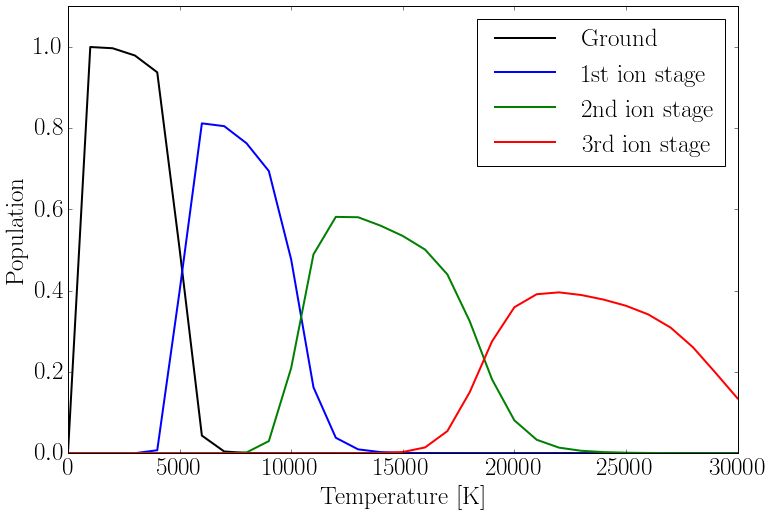

In [198]:
temp=1000*np.arange(31)      # make array 0,...,30000 in steps of 1000 K
#print temp                  # check
pop=np.zeros([5,31])         # declare float array for n(r,T)
for T in range(1,31):   
    for r in range(1,5):
        pop[r,T]=sahabolt_E(temp[T],131.,r,1)

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(temp,pop[1,:],c='k', lw=2.0, label='Ground')
ax0.plot(temp,pop[2,:], lw=2.0, label='1st ion stage')
ax0.plot(temp,pop[3,:], lw=2.0, label='2nd ion stage')
ax0.plot(temp,pop[4,:], lw=2.0, label='3rd ion stage')
ax0.legend()
ax0.set_xlabel(r"Temperature [K]")
ax0.set_ylabel(r"Population")
ax0.set_ylim([1e-3, 1.1])
#ax0.semilogy()
plt.show()

**What causes the steep flanks on the left and the right side of each peak? What happens for $T \rightarrow 0$ and for $T \rightarrow \infty$?**   

>The steep flanks are a result of the exponential temperature dependence of the Saha Equation. As Rutten summarizes on page 13, in TE one expects to find at most only two adjacent ionization stages to be present in a gas of given temperature, with more or less a steep exponential population decay with excitation energy within each ionization stage. Thus if the flanks were not steep then for a given temperature many ionization stages would overlap. Adjacent flanks seem to have approximately equal and opposite growth/decay as the temperature shifts favor from one ionization stage to the next. 


**Payne plotted her curves for the actual lower levels of the lines specified by their wavelengths in the upper panel, including their Boltzmann factor. Study its influence on your E curves by adding curves for higher values of s to your plot:**

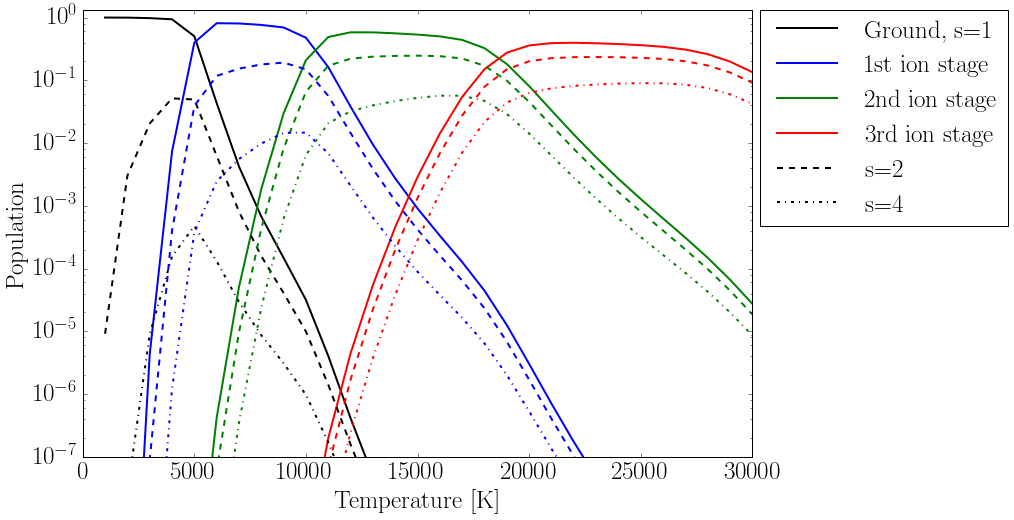

In [197]:
temp=1000*np.arange(31)   # make array 0,...,30000 in steps of 1000 K
#print temp             # check
pop=np.zeros([5,31])       # declare float array for n(r,T)
for T in range(1,31):        # $ continues statement to next line
    for r in range(1,5):
        pop[r,T]=sahabolt_E(temp[T],131.,r,1)

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(temp,pop[1,:],c='k', lw=2.0, label='Ground, s=1')
ax0.plot(temp,pop[2,:],c='b', lw=2.0, label='1st ion stage')
ax0.plot(temp,pop[3,:],c='g', lw=2.0, label='2nd ion stage')
ax0.plot(temp,pop[4,:],c='r', lw=2.0, label='3rd ion stage')
ax0.set_xlabel(r"Temperature [K]")
ax0.set_ylabel(r"Population")
ax0.set_ylim([1e-7, 1.3])
ax0.semilogy()

for T in range(1,31):  #repeat for s=2 (excitation energy = 1 eV)
    for r in range(1,5):  
        pop[r,T]=sahabolt_E(temp[T],131.,r,2)
ax0.plot(temp,pop[1,:],c='k', lw=2.0, ls='--', label='s=2')#, label='Ground')
ax0.plot(temp,pop[2,:],c='b', lw=2.0, ls='--')# label='1st ion stage')
ax0.plot(temp,pop[3,:],c='g', lw=2.0, ls='--')# label='2nd ion stage')
ax0.plot(temp,pop[4,:],c='r', lw=2.0, ls='--')#label='3rd ion stage')
for T in range(1,31):  #repeat for s=4 (excitation energy = 3 eV)
    for r in range(1,5): 
        pop[r,T]=sahabolt_E(temp[T],131.,r,4)
ax0.plot(temp,pop[1,:],c='k', lw=2.0, ls='-.', label='s=4')#, label='Ground')
ax0.plot(temp,pop[2,:],c='b', lw=2.0, ls='-.')# label='1st ion stage')
ax0.plot(temp,pop[3,:],c='g', lw=2.0, ls='-.')# label='2nd ion stage')
ax0.plot(temp,pop[4,:],c='r', lw=2.0, ls='-.')#label='3rd ion stage')

ax0.legend(bbox_to_anchor=(1.4,1.03))
plt.show()

**Explain the changes between the three sets of curves. What happens for elements with lower/higher ionization energies than E has?**  

>The difference between the ionization stage curves is due to the Saha equation and the difference between the excitation energy level curves is due to the Boltzmann equation. Different ionization stage curves grow and decay as exponentials of temperature. However, for any given ionization stage, curves have an exponential population decay with excitation energy. Elements with lower ionization energies than E would have curves shifted to lower temperatures, while those with higher ionization energies would have curves shifted to higher temperature. 


# 2.7 Saha-Boltzmann populations of hydrogen  
** Write a function ``sahabolt_H(,temp,elpress,s)`` that produces the population of hydrogen level $s$ (of course by copying bits and pieces with cut & paste from your routines for element E):**

In [124]:
def sahabolt_H(temp,elpress,level):
    '''
    compute Saha-Boltzmann population n_(1,s)/N_H for hydrogen level
    input: temperature, electron pressure, level number
    '''
    
    # physics constants
    kerg=1.380658e-16     # Boltzmann constant (erg K; double precision)
    kev=8.61734e-5        # Boltzmann constant (eV/deg)
    h=6.62607e-27         # Planck constant (erg s)
    elmass=9.109390e-28 # electron mass (g)
    
    # kT and electron density
    kevT=kev*temp
    kergT=kerg*temp
    eldens=elpress/kergT
    
    # energy levels and weights for hydrogen
    nrlevels=100                  # reasonable partition function cut-off value
    g=np.zeros([2,nrlevels])      # declaration weights (too many for proton)
    chiexc=np.zeros([2,nrlevels]) # declaration excitation energies (idem)
    for s in range(0,nrlevels):   
        g[0,s]=2*(s+1)**2                   # statistical weights
        chiexc[0,s]=13.598*(1-1./(s+1)**2)  # excitation energies
    g[1,0]=1                      # statistical weight free proton
    chiexc[1,0]=0.                # excitation energy proton ground state
    
    # partition functions
    u=np.zeros(2)
    u[0]=0.
    for s in range(0,nrlevels): u[0]=u[0]+ g[0,s]*np.exp(-chiexc[0,s]/kevT)
    u[1]=g[1,0]
    
    # Saha
    sahaconst=(2*np.pi*elmass*kergT/(h*h))**1.5 * 2./eldens
    nstage=np.zeros(2)
    nstage[0]=1.                  # relative fractions only
    nstage[1] = nstage[0] * sahaconst * u[1]/u[0] * np.exp(-13.598/kevT)
    ntotal=np.sum(nstage)          # sum both stages = total hydrogen density

    # Boltzmann
    nlevel = nstage[0]*g[0,level-1]/u[0]*np.exp(-chiexc[0,level-1]/kevT)
    nlevelrel=nlevel/ntotal       # fraction of total hydrogen density
    
    return nlevelrel

# 2.8 Solar Ca$^+$ K versus H$\alpha$: line strength

**Explain qualitatively why the solar Ca$^{+}$ K line is much stronger than the solar H$\alpha$ line, even though hydrogen is not ionized in the solar photosphere and low chromosphere ($T \approx 4000 - 6000$ K) where these lines are formed, and even though the solar Ca/H abundance ratio is only $N_{Ca} /N_H = 2 \times 10^{-6}$ . Assume again that the observed line strength scales with the lower-level population density (which it does, although nonlinearly through a "curve of growth" as you will see in the next exercise).**  

>The H$\alpha$ line is a 3-2 transtion, while the Ca$^{+}$ K line is a 2-1 transition, so the lower-level is different for the two transitions. The plot of Population vs Temperature indicated that the population exponentially decays with excitation energy. So the population density is higher in the lower-level of Ca$^{+}$ (lower-level: 1) compared to H$\alpha$ (lower-level: 2). Furthermore the ionization energy is lower for calcium compared to hydrogen, so the calcium population curves will be shifted to lower temperatures than the hydrogen ionization curves. Even though hydrogen is much more abundant than calcium in the solar photosphere, at that temperature Ca$^{+}$ has a greater lower-level population density than H$\alpha$.

**Prove your explanation by computing the expected strength ratio of these two lines as function of temperature for $P_e = 102$ dyne cm$^{−2}$. Simply combine the actual calcium ionization energies with the Schadee adhoc level structure. Since the Ca$^+$ K line originates from the Ca$^+$ ground state the higher levels are only needed for the partition functions and those are estimated to within a factor of two by the Schadee recipe. Therefore simply copy all your routines for Schadee's element E into routines for Ca and only adapt the ionization energies. They are given in Table 3.**

In [229]:
def partfunc_Ca(temp):
    # partition functions Ca
    # input: temp (K)
    # output: fltarr(4) = partition functions U1,..,U4
    u=np.zeros(4)
    # Ca+ ionization energies (in eV) are rounded to the nearest integer
    # for the below loop to iterate in discrete 1 eV steps. 
    chiion=[6,12,51,67]
    k=8.61734e-5
    for r in range(0,4):
        for s in range(0, chiion[r]): 
            u[r]=u[r] + np.exp(-s/(k*temp))
    return u

def boltz_Ca(temp,r,s):
    # compute Boltzmann population for level r,s of Schadee element E
    # input: temp (temperature, K)
    #     r (ionization stage nr, 1 - 4 where 1 = neutral E)
    #     s (level nr, starting at s=1)
    # output: relative level population n_(r,s)/N_r
    u=partfunc_Ca(temp)
    keV=8.61734e-5
    # Boltzmann constant in ev/deg
    relnrs = 1./u[r-1]*np.exp(-(s-1)/(keV*temp))
    return relnrs

def saha_Ca(temp,elpress,ionstage):
    # compute Saha population fraction N_r/N for Schadee element Ca
    # input: temperature, electron pressure, ion stage
    # physics constants
    kerg=1.380658e-16   # Boltzmann constant (erg K; double precision)
    kev=8.61734e-5      # Boltzmann constant (eV/deg)
    h=6.62607e-27       # Planck constant (erg s)
    elmass=9.109390e-28 # electron mass (g)
    # kT and electron density
    kevT=kev*temp
    kergT=kerg*temp
    eldens=elpress/kergT
    chiion=[6,12,51,67]            # (rounded) ionization energies for element Ca
    u=partfunc_Ca(temp)            # get partition functions U[0]...u[3]
    u=np.hstack([u,2])                       # add estimated fifth value to get N_4 too
    sahaconst=(2*np.pi*elmass*kergT/(h*h))**1.5 * 2./eldens
    nstage=np.zeros(5)     # double-precision float array
    nstage[0]=1.           # relative fractions only (no abundance)
    for r in range(0,4):
        nstage[r+1] = nstage[r]*sahaconst*u[r+1]/u[r]*np.exp(-chiion[r]/kevT)
    ntotal=np.sum(nstage)        # sum all stages = element density
    nstagerel=nstage/ntotal      # fractions of element density
    return nstagerel[ionstage-1] # ion stages start at 1, IDL at 0

def sahabolt_Ca(temp,elpress,ion,level):
    # compute Saha-Boltzmann populaton n_(r,s)/N for level r,s of Ca
    # input: temperature, electron pressure, ionization stage, level nr
    return saha_Ca(temp,elpress,ion) * boltz_Ca(temp,ion,level)

**Then apply these routines as in:**

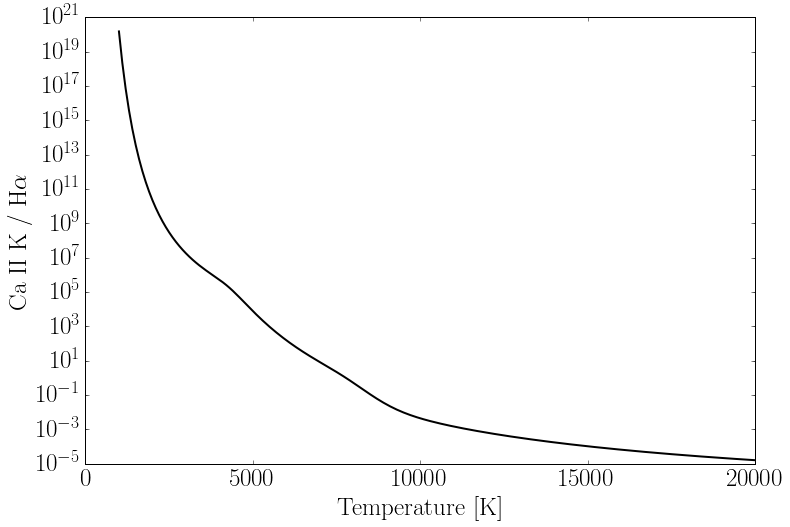

In [230]:
temp=np.arange(1000,20100,100, dtype=float)     # T = 1000-20000 in delta T = 100
CaH = np.zeros_like(temp)                       # declare ratio array
Caabund=2e-6                                    # A_Ca = N_Ca / N_H
for i in range(len(temp)):
    NCa = sahabolt_Ca(temp[i],1e2,2,1)
    NH = sahabolt_H(temp[i],1e2,2)
    CaH[i]=NCa*Caabund/NH

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(temp,CaH,c='k', lw=2.0)
ax0.set_xlabel(r"Temperature [K]")
ax0.set_ylabel(r"Ca II K / H$\alpha$")
ax0.semilogy()
plt.show()

>The above plot confirms that at solar temperatures ($\sim 5600$ K) the number density of electrons in the $n=1$ state of CaII is at least an order of magnitude greater than the number density of electrons in the $n=2$ state of H.  

**Estimate the solar line strength ratio Ca$^+$ K/H$\alpha$. The temperature ranges over $T = 4000 - 6000$ K in the solar photosphere. You should get:**

In [232]:
print 'Ca/H ratio at 5000 ̃K = ', CaH[(temp > 4900) & (temp < 5100)][0]

Ca/H ratio at 5000 ̃K =  7841.84988858


# 2.9 Solar Ca$^+$ K versus Hα: temperature sensitivity  
**The two lines also differ much in their temperature sensitivity in this formation regime. Show this by plotting the relative population changes $(\Delta n_{Ca} / \Delta T )/ n_{Ca}$ and $( \Delta n_{H} / \Delta T ) / n_H$ for the two lower levels as function of temperature for a small temperature change $\Delta T$:**

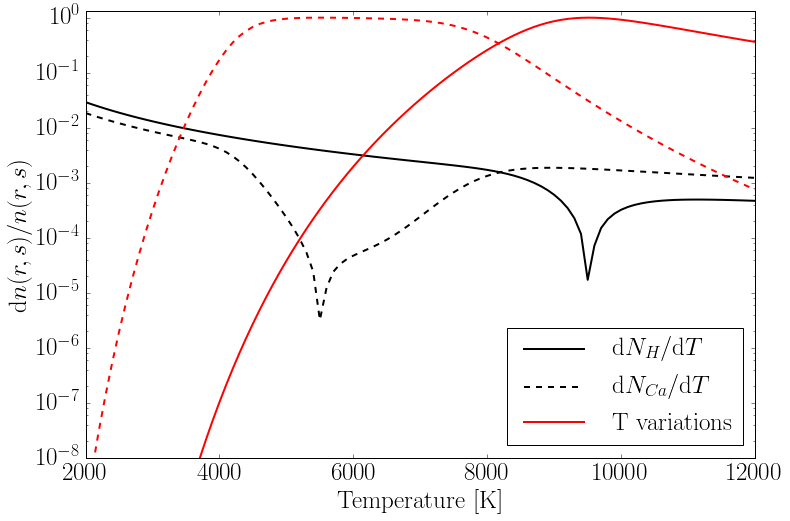

In [237]:
# temperature sensitivity CaIIK and Halpha
temp=np.arange(2000,12100,100, dtype=float)   # T = 2000-12000, delta T = 100
dNCadT = np.zeros_like(temp)   
dNHdT = np.zeros_like(temp)
NCa=np.zeros_like(temp)
NH=np.zeros_like(temp)
dT=1.
for i in range(len(temp)):
    NCa[i] = sahabolt_Ca(temp[i],1e2,2,1)   # Ca ion ground state
    NH[i] = sahabolt_H(temp[i],1e2,2)       # H atom 2nd level
    NCa2 = sahabolt_Ca(temp[i]-dT,1e2,2,1)  # idem dT cooler
    dNCadT[i]= (NCa[i] - NCa2)/dT/NCa[i]    # fractional diff quotient
    NH2 = sahabolt_H(temp[i]-dT,1e2,2)      # idem dT cooler
    dNHdT[i] = (NH[i]-NH2)/dT/NH[i]         # fractional diff quotient


# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(temp,np.abs(dNHdT),c='k', lw=2.0, label=r'd$N_H / $d$T$')
ax0.plot(temp,np.abs(dNCadT),c='k', lw=2.0, label=r'd$N_{Ca} / $d$T$', ls='--')
ax0.set_xlabel(r"Temperature [K]")
ax0.set_ylabel(r"d$n(r,s) / n(r,s)$")
ax0.semilogy()
ax0.plot(temp,NH/np.max(NH), c='r', lw=2.0, label=r'T variations')
ax0.plot(temp,NCa/np.max(NCa),ls='--', c='r', lw=2.0)
ax0.set_ylim([1e-8,1.3])
ax0.legend(loc=4)
plt.show()

**Around $T = 5600$ K the Ca$^+$ K curve dips down to very small values; the H$\alpha$ curve does that around $T = 9500$ K. Thus, for $T \approx 5600$ K the temperature sensitivity of Ca$^+$ K is much smaller than the temperature sensitivity of H$\alpha$. Each dip has a $\Delta n > 0$ and a $\Delta n < 0$ flank. Which is which?**

>$\Delta n > 0$ is the left flanks and for calcium occurs as more Ca$^+$ ions are formed and for hydrogen as more electrons are entering the n=2 state. $\Delta n < 0$ is the right flank and for calcium occurs as now more electrons enter the n=2 state of Ca$^+$, while for hydrogen now more electrons are being ionized. 


**Explain each flank of the two population curves and the dips in the two temperature sensitivity curves.**

>The flanks in the two population curves reflect how the population is changing with temperature. Around 5600 K where the Ca$^+$ K curve dips down the Ca$^+$ n=1 population is maximally changing with temperature. Similarly, around 9500 K where the H$\alpha$ curve dips down the H$\alpha$ n=2 population is maximally changing with temperature. The dips in the temperature sensitivity curves (the right side of each curve) occur because the population density at that respective lower level is now decreasing with temperature. For calcium this is due to Boltzmann excitation pushing electrons to higher energy states and for hydrogen it is due to Saha ionization. 

# 2.10 Hot stars versus cool stars  
**Final question: find at which temperature the hydrogen in stellar photospheres with $P_e$ = 102 is about 50% ionized:**

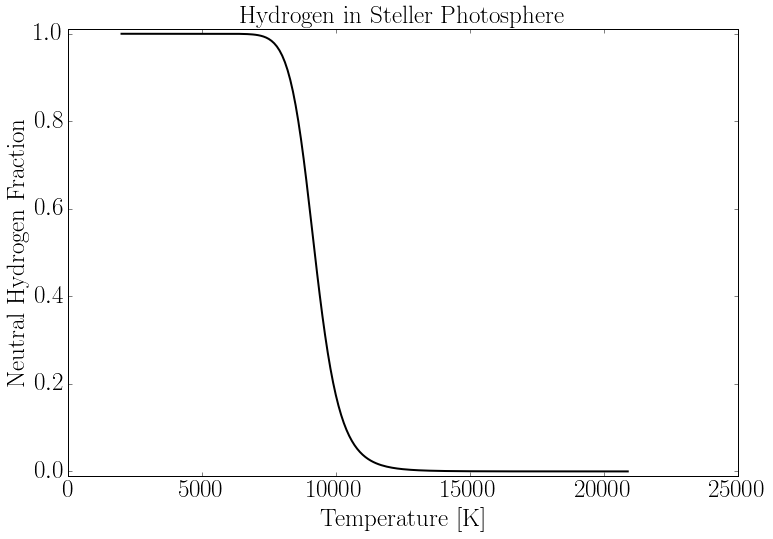

In [221]:
temp=np.arange(2000,21000,100, dtype=float)   # T = 2000-20000, delta T = 100
nH = np.zeros_like(temp)
for i in range(len(temp)): 
    nH[i]=sahabolt_H(temp[i],1e2,1)
    
# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(temp,nH,c='k', lw=2.0)
ax0.set_xlabel(r"Temperature [K]")
ax0.set_ylabel(r"Neutral Hydrogen Fraction")
ax0.set_title("Hydrogen in Steller Photosphere")
ax0.set_ylim([-0.01, 1.01])
plt.show()

>Hydrogen in the stellar photosphere is 50% ionized at $T \approx 10000$ K. 